# Reinforcement Learning - Test

## Enviroment

In [1]:
import gym 
env = gym.make('CartPole-v1')

states = env.observation_space.shape[0]
actions = env.action_space.n

## Random Actions
> * `action = random.choice([0,1])` 
> $\rightarrow$ **action** wird über  `env.step(action)` an **Enviroment** übergeben.


> * `new_state, reward, done, info = env.step(action)`

In [2]:
import time
import random
from numpy import mean
import matplotlib.pyplot as plt

def random_action():
    
    time.sleep(1)
    
    episodes = 50
    scores = []
    
    for episode in range(1, episodes+1):

        state = env.reset()
        done = False
        score = 0 

        while not done:
            env.render()
            action = random.choice([0,1])
            new_state, reward, done, info = env.step(action)
            score += reward
        scores.append(score)
        time.sleep(0.01)
    env.close()

    mean_reward = mean(scores)
    fig, (ax1) = plt.subplots(1,1, figsize=(7,3),dpi=120)
    ax1.plot(scores, label=r'scores')
    ax1.plot([0,episodes-1],[mean_reward,mean_reward], label=r'mean')
    ax1.set_title('Random Actions')
    ax1.set_xlabel('episode')  
    ax1.set_ylabel('reward')  
    ax1.legend(loc=('best'), frameon=False, fontsize=10)
    plt.savefig("images/RandomActions.png")

Button(description='Random Actions', style=ButtonStyle())

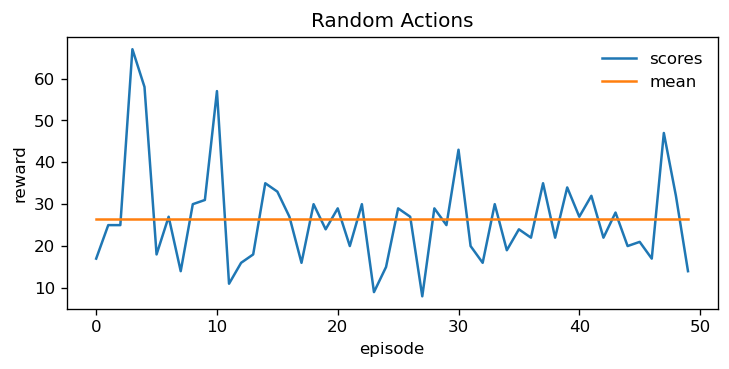

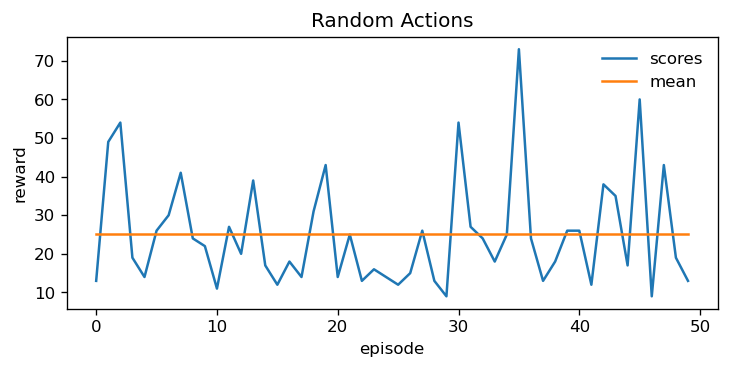

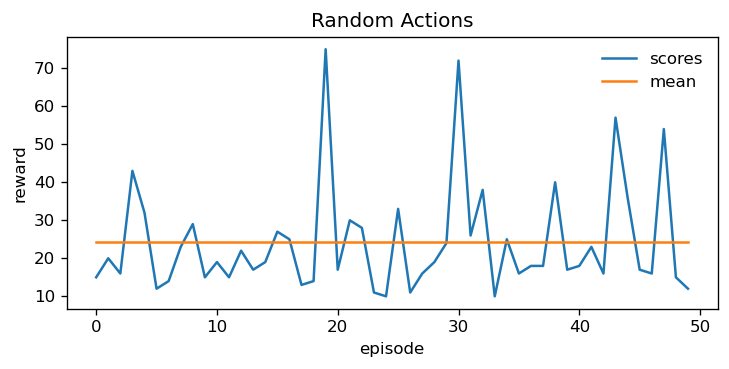

In [3]:
import ipywidgets as widgets
from IPython.display import display

button = widgets.Button(description="Random Actions")
display(button)

def on_button_clicked(b):
    
    random_action()

button.on_click(on_button_clicked)

## Build DQN-Agent

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

model = build_model(states, actions)
#model.summary()

from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=80000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=20, target_model_update=1e-2)
    return dqn

model = build_model(states, actions)

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

## Load weights

In [5]:
dqn.load_weights('weights/dqn_weights.h5f')

## Test Agent

Testing for 50 episodes ...
Episode 1: reward: 500.000, steps: 500
Episode 2: reward: 500.000, steps: 500
Episode 3: reward: 500.000, steps: 500
Episode 4: reward: 500.000, steps: 500
Episode 5: reward: 500.000, steps: 500
Episode 6: reward: 500.000, steps: 500
Episode 7: reward: 500.000, steps: 500
Episode 8: reward: 500.000, steps: 500
Episode 9: reward: 500.000, steps: 500
Episode 10: reward: 500.000, steps: 500
Episode 11: reward: 500.000, steps: 500
Episode 12: reward: 500.000, steps: 500
Episode 13: reward: 500.000, steps: 500
Episode 14: reward: 500.000, steps: 500
Episode 15: reward: 500.000, steps: 500
Episode 16: reward: 500.000, steps: 500
Episode 17: reward: 500.000, steps: 500
Episode 18: reward: 500.000, steps: 500
Episode 19: reward: 500.000, steps: 500
Episode 20: reward: 500.000, steps: 500
Episode 21: reward: 500.000, steps: 500
Episode 22: reward: 500.000, steps: 500
Episode 23: reward: 500.000, steps: 500
Episode 24: reward: 500.000, steps: 500
Episode 25: reward: 5

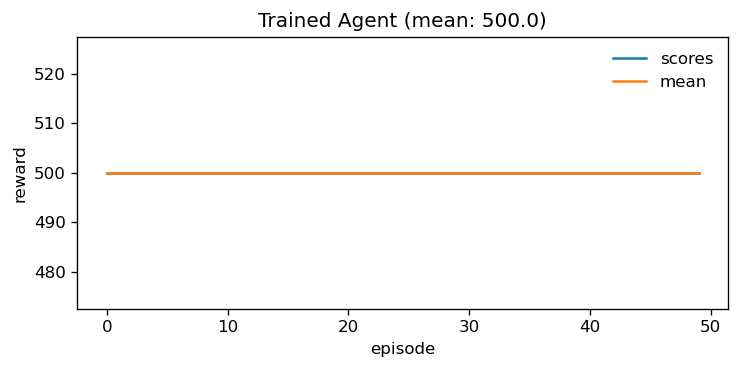

In [7]:
episodes = 50
scores = dqn.test(env, nb_episodes=episodes, visualize=False, verbose=1)

mean_reward = mean(scores.history['episode_reward'])
fig, (ax1) = plt.subplots(1,1, figsize=(7,3),dpi=120)
ax1.plot(scores.history['episode_reward'], label=r'scores')
ax1.plot([0,episodes-1],[mean_reward,mean_reward], label=r'mean')
ax1.set_title(f'Trained Agent (mean: {round(mean_reward,2)})')
ax1.set_xlabel('episode')
ax1.set_ylabel('reward')
ax1.legend(loc=('best'), frameon=False, fontsize=10)
plt.savefig("images/TrainedAgent.png")

In [8]:
button_test = widgets.Button(description="Test Agent")
display(button_test)

def on_button_test_clicked(b):
    
    time.sleep(1)
    _ = dqn.test(env, nb_episodes=5, visualize=True, verbose=1)
    env.close()

button_test.on_click(on_button_test_clicked)

Button(description='Test Agent', style=ButtonStyle())

Testing for 5 episodes ...
Episode 1: reward: 500.000, steps: 500
Episode 2: reward: 500.000, steps: 500
Episode 3: reward: 500.000, steps: 500
Episode 4: reward: 500.000, steps: 500
Episode 5: reward: 500.000, steps: 500
